In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime

In [81]:
data= pd.read_csv("../turning_patterns_into_profits/Data/Transactions_all_data.csv")

data.head()

,transaction_id,cust_id,DOB,Gender,city_code,tran_date,prod_subcat,prod_subcat_code,prod_cat,prod_cat_code,...,Rate,Tax,total_amt,Store_type,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,80712190438,270351,09/26/81,M,5,2/28/2014,Women,1,Clothing,1,...,-772,405.300,-4265.300,e-Shop,NaN,NaN,NaN,NaN,NaN,NaN
1,29258453508,270384,11/05/73,F,8,2/27/2014,Computers,5,Electronics,3,...,-1497,785.925,-8270.925,e-Shop,NaN,NaN,NaN,NaN,NaN,NaN
2,51750724947,273420,07/27/92,M,8,2/24/2014,DIY,6,Books,5,...,-791,166.110,-1748.110,TeleShop,NaN,NaN,NaN,NaN,NaN,NaN
3,93274880719,271509,08/06/81,M,3,2/24/2014,Children,11,Home and kitchen,6,...,-1363,429.345,-4518.345,e-Shop,NaN,NaN,NaN,NaN,NaN,NaN
4,51750724947,273420,07/27/92,M,8,2/23/2014,DIY,6,Books,5,...,-791,166.110,-1748.110,TeleShop,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
data.drop(["Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20"], axis=1, inplace=True)

In [83]:
month_list=[]
year_list=[]
mo_yr_list=[]

for each_date in data['tran_date']:
    date= datetime.datetime.strptime(str(each_date), "%m/%d/%Y")
    month_list.append(date.month)
    year_list.append(date.year)
    mo_yr_list.append(f"{date.month}/{date.year}")

In [84]:
data["transaction_month"] = month_list
data["transaction_year"] = year_list
data["transaction_MoYr"] = mo_yr_list

data.head()

,transaction_id,cust_id,DOB,Gender,city_code,tran_date,prod_subcat,prod_subcat_code,prod_cat,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,transaction_month,transaction_year,transaction_MoYr
0,80712190438,270351,09/26/81,M,5,2/28/2014,Women,1,Clothing,1,-5,-772,405.300,-4265.300,e-Shop,2,2014,2/2014
1,29258453508,270384,11/05/73,F,8,2/27/2014,Computers,5,Electronics,3,-5,-1497,785.925,-8270.925,e-Shop,2,2014,2/2014
2,51750724947,273420,07/27/92,M,8,2/24/2014,DIY,6,Books,5,-2,-791,166.110,-1748.110,TeleShop,2,2014,2/2014
3,93274880719,271509,08/06/81,M,3,2/24/2014,Children,11,Home and kitchen,6,-3,-1363,429.345,-4518.345,e-Shop,2,2014,2/2014
4,51750724947,273420,07/27/92,M,8,2/23/2014,DIY,6,Books,5,-2,-791,166.110,-1748.110,TeleShop,2,2014,2/2014


In [ ]:
### create column with product_id  which is a concatenation of cat and subcat
cust_id | age | gender | 1-1, 5-3, 6-5
cust_id | age | gender | 1-1, 5-3

### create algorithm to see what items are returned and by who


In [85]:
##  create a df to use to plot category 1 total_amts by year.
## Look for trend in a single category rising every year

data1= data.loc[data["prod_cat_code"]==1]
data1=data1.groupby(['transaction_year']).sum()
data1=data1.reset_index()
data1.head()

,transaction_year,transaction_id,cust_id,city_code,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,transaction_month
0,2011,43649520636969,227698183,4622,2250,840,2066,531911,214565.925,1775218.965,6065
1,2012,46998232046677,256452022,5212,2503,946,2325,601847,241352.370,2064051.600,6225
2,2013,49045220994897,274213378,5571,2659,1012,2435,648198,254180.430,2100717.710,6640
3,2014,8768414477824,43930700,882,425,162,348,98027,40376.385,311149.215,215


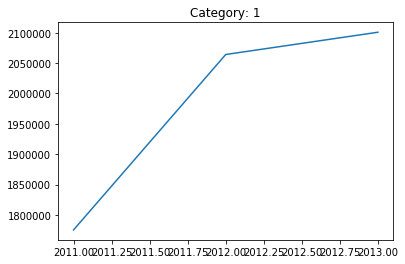

Model Score: 0.8332933604405848    2014 Predicted Sales: [[2305494.83666658]]


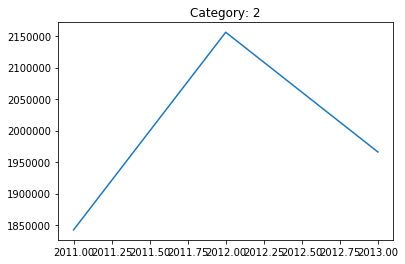

Model Score: 0.15306693815041217    2014 Predicted Sales: [[2111854.26833332]]


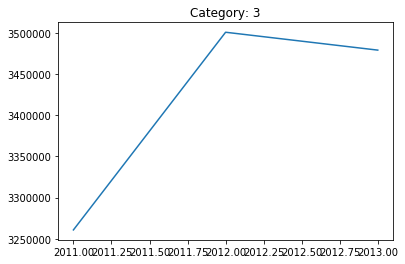

Model Score: 0.6760901495014243    2014 Predicted Sales: [[3632442.92666668]]


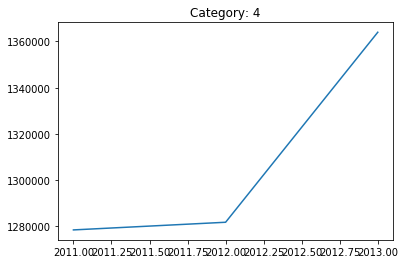

Model Score: 0.7790177511609053    2014 Predicted Sales: [[1393593.955]]


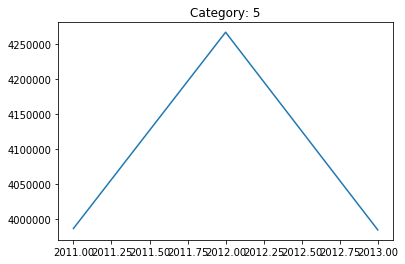

Model Score: 3.7928102906703565e-05    2014 Predicted Sales: [[4077185.16833333]]


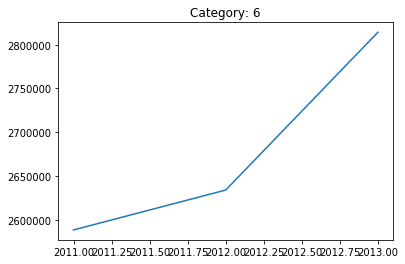

Model Score: 0.893943047052628    2014 Predicted Sales: [[2904655.30333334]]


In [92]:
categories=[1,2,3,4,5,6]

for each_category in categories:
    data1=data.loc[data['prod_cat_code']== each_category]
    data1=data1.groupby(['transaction_year']).sum()
    data1=data1.reset_index()
    data1=data1.drop(3)
    
    X=data1['transaction_year'].values.reshape(-1,1)
    y=data1['total_amt'].values.reshape(-1,1)
    
    plt.plot(X,y)
    plt.title(f"Category: {each_category}")
    plt.show()
    
    model=LinearRegression()
    model.fit(X,y)
    Score=model.score(X,y)
    prediction=model.predict([[2014]])
    
    print(f"Model Score: {Score}    2014 Predicted Sales: {prediction}")

In [ ]:
## 2014 has only 2 months of sales.
## Overall sales are fairly even from year to year, but cannot be predicted by month. 
## Therefore weekly data will not be useful either.